In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

C:\Users\EECC\AppData\Local\Temp\ipykernel_7032\2738296547.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
data = pd.read_csv('Data.csv',header=None,names=['Exam 1','Exam 2','Admitted'])
data.head(10)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [8]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [6]:
# data = (data - data.mean()) / data.std()

In [9]:
postive = data[data['Admitted'].isin([1])]

In [10]:
negative = data[data['Admitted'].isin([0])]

Text(0, 0.5, 'Exam 2 Score')

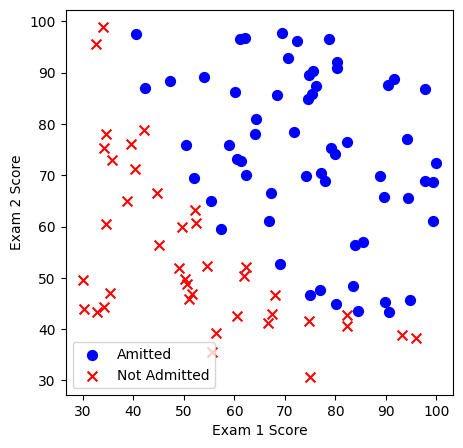

In [12]:
fig , ax = plt.subplots(figsize=(5,5))
ax.scatter(postive['Exam 1'],postive['Exam 2'],s=50,c='b',marker='o',label='Amitted')
ax.scatter(negative['Exam 1'],negative['Exam 2'],s=50,c='r',marker='x',label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

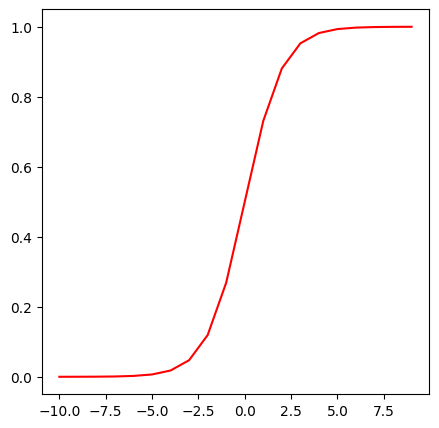

In [14]:
nums = np.arange(-10,10,step=1)
fig , ax = plt.subplots(figsize=(5,5))
ax.plot(nums,sigmoid(nums),'r')

In [15]:
def cost(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    first = np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply((1-y),np.log(1 - sigmoid(X*theta.T)))
    return np.sum(first-second) / (len(X))

In [16]:
data.insert(0,'Ones',1)

In [18]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
y

0     0
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    1
Name: Admitted, Length: 100, dtype: int64

In [19]:
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [20]:
thiscost = cost(theta,X,y)

In [21]:
print(thiscost)

69.31471805599453


In [22]:
def gradient(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y 
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

In [23]:
gra = gradient(theta,X,y)
print(gra)

[ -10.         -656.44274057 -662.21998088]


In [25]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost,x0=theta,fprime=gradient,args=(X,y))


In [26]:
costAfterOptimize = cost(result[0],X,y)
print(costAfterOptimize)

67.30116670113844


In [27]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))


accuracy = 60%
